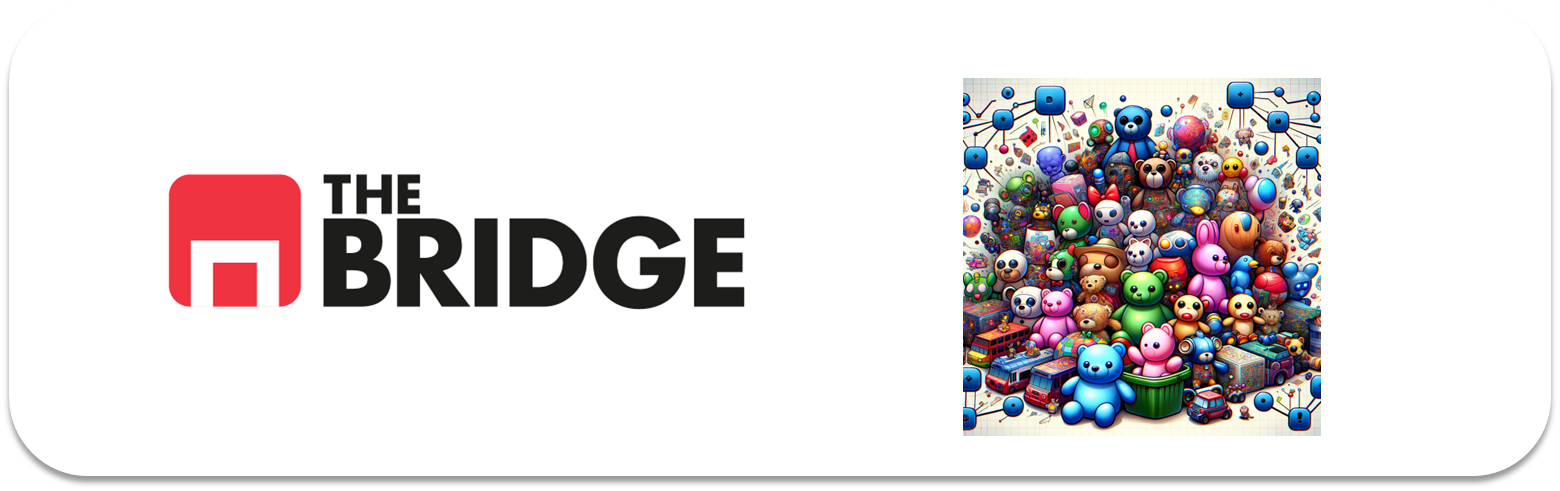

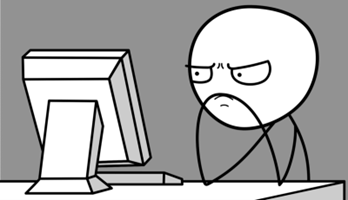

## PRACTICA OBLIGATORIA: DBSCAN y CLUSTERING JERARQUICO

* La práctica obligatoria de esta unidad consiste en un ejercicio de modelado no supervisado aplicado a clustering jerárquico y no jerárquico. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [145]:
import pandas as pd
import numpy as np

# pintar
import matplotlib.pyplot as plt
import seaborn as sns

### Parte I. Modelado

#### Descripción del problema.

En una planta de experimentación con nuevas bebidas energéticas están trabajando con diferentes mezclas de componentes para obtener posibles variedades de su producto estrella "NonstopU". El problema es que la fabricación de cada "prototipo" conlleva demasiado tiempo y las pruebas de sabores y de propiedades "non-stop" antisueño y antifatiga son costosas.  

En ese sentido quieren construir algún sistema de segmentación previa de mezclas sin probarlas solo indicando las cantidades de cada componente de la bebida. Tienen datos pero desgraciadamente de mezclas anteriores con diferentes medidas pero que por temas presupuestarios y de prioridad no se hicieron test con usuarios y potenciales clientes, es decir no tienen un target de capacidad antifatiga o de preferncia del usuario que puedas servirles para construir un clasificador clásico como han hecho otras veces.  

Han acudido a vosotros con la necesidad de encontrar ese segmentador de posibles bebidas y con los datos de las mezclas no probadas anteriores por ver si vostros podéis ayudarles a ***encontrar algún tipo de segmentación*** que luego ello se encargarían de interpretar. No es requisito obligatorio pero ***les gustaría también poder establecer algún tipo de relación entre las segmentaciones (tipo cuales segmentos se "parecerían" más entre sí)***

NOTA ORIENTATIVA: Los químicos ***no esperan que haya menos de 3 segmentos ni más de 5***.  
NOTA OPERATIVA: El dataset con los datos que nos han dado los químicos está en "./data/empowering_drinks.csv"

**Se pide**: Construir al menos dos algoritmos de clustering (DBSCAN debe ser uno de ellos y el otro debería estar claro cual deberíamos usar dado el enunciado). Compararlos brevemente aunque sea meramente especulativo (¿Por qué es espculativo?)

**Se recomienda**: Visualizar las features dos a dos para escoger las mejores, no necesariamente hay que usar todas, ni tampoco quedarse en dos. Probar diferentes hiperparámetros en función de la nota orientativa y explicar porqué se han escogido los que finalmente se hayan escogido. 

Recuerda que el proceso es similar a lo que vimos en el otro tipo de aprendizaje:
1. Entender el problema
2. Cargar datos, visualizar.
3. MiniEDA: Selección de features
4. Tratamiento de Features.
5. Selección de modelos, selección de hiperparámetros
6. Entrenamiento, visualización de resultados.
7. Discusión de los mismos


In [146]:
data = pd.read_csv("./data/empowering_drinks.csv",sep='|')
data

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.518613,0.232053,1.034819,1.013009,0.251717
1,0.246290,-0.827996,0.733629,0.965242,-0.293321
2,0.196879,1.109334,1.215533,1.395148,0.269020
3,1.691550,0.487926,1.466525,2.334574,1.186068
4,0.295700,1.840403,0.663351,-0.037874,-0.319276
...,...,...,...,...,...
148,0.493343,0.414820,-1.284344,0.009893,0.969783
149,0.332758,-0.389355,-1.344582,0.280575,2.224236
150,0.209232,0.012732,-1.354622,0.296498,1.834923
151,1.395086,1.365208,-1.274305,-0.595160,1.791666


In [147]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Azúcares               153 non-null    float64
 1   Vitamínas del grupo B  153 non-null    float64
 2   Cafeína                153 non-null    float64
 3   Ácido Cítrico          153 non-null    float64
 4   Taurina                153 non-null    float64
dtypes: float64(5)
memory usage: 6.1 KB


In [148]:
data.describe().T #Los datos están estandarizados

,count,mean,std,min,25%,50%,75%,max
Azúcares,153.0,0.019231,1.026182,-2.434235,-0.816038,0.061000,0.876275,2.259772
Vitamínas del grupo B,153.0,0.037273,0.995984,-3.679162,-0.499016,-0.023821,0.707247,3.156325
Cafeína,153.0,0.041057,1.040928,-1.695971,-1.043392,0.211566,0.894264,3.062832
Ácido Cítrico,153.0,0.080022,1.009450,-1.493188,-0.738463,-0.165254,0.917474,2.971473
Taurina,153.0,-0.044088,0.934399,-1.634288,-0.799428,-0.154899,0.493956,2.431870


<Figure size 1000x2000 with 0 Axes>

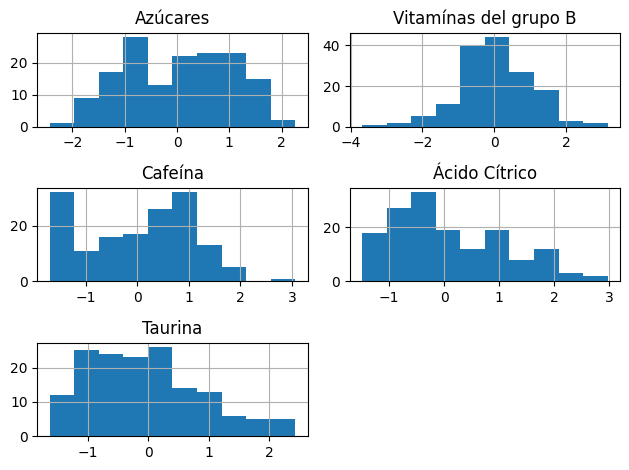

In [149]:
plt.figure(figsize=(10,20))
data.hist()
plt.tight_layout()
plt.show()

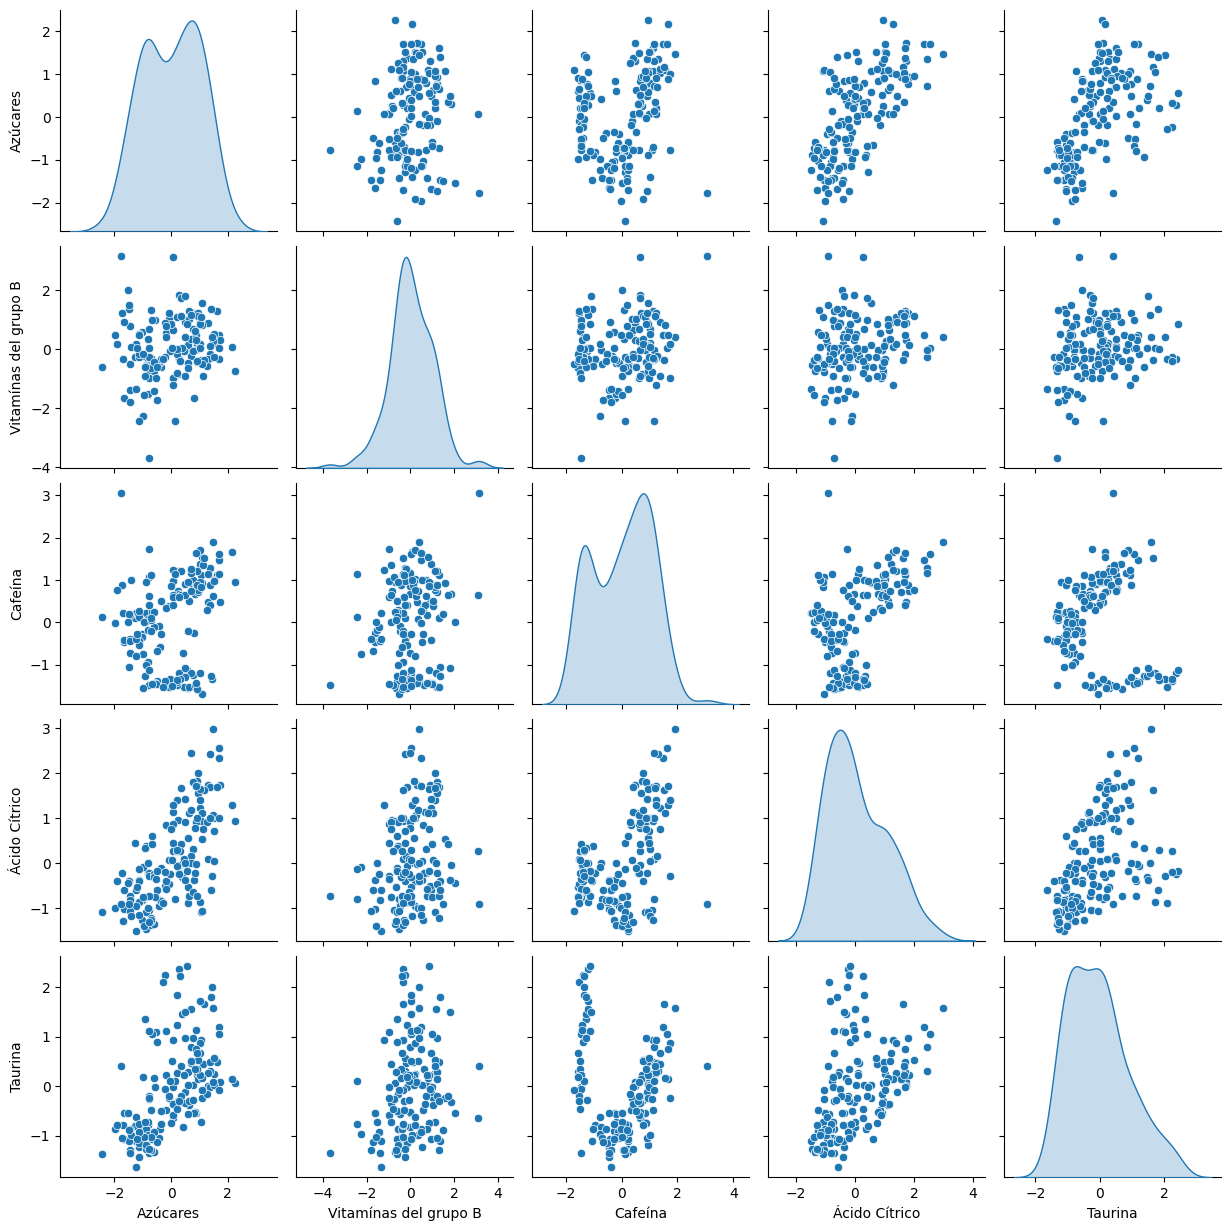

In [150]:
sns.pairplot(data=data, kind='scatter', diag_kind='kde', height=2.5)
plt.show()

In [151]:
#transformación logarítmica
data_transformed = data.copy()

data_transformed = data_transformed.apply(np.log10)

data_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
Azúcares,81.0,-0.198176,0.409032,-1.708547,-0.352684,-0.069780,0.064602,0.354065
Vitamínas del grupo B,75.0,-0.282315,0.494807,-1.895100,-0.490906,-0.107709,0.065961,0.499182
Cafeína,87.0,-0.258962,0.588457,-3.134757,-0.384853,-0.068489,0.055061,0.486123
Ácido Cítrico,69.0,-0.216098,0.595965,-2.004654,-0.372760,-0.022588,0.191555,0.472972
Taurina,68.0,-0.309373,0.515122,-1.741625,-0.606820,-0.256298,0.062008,0.385940


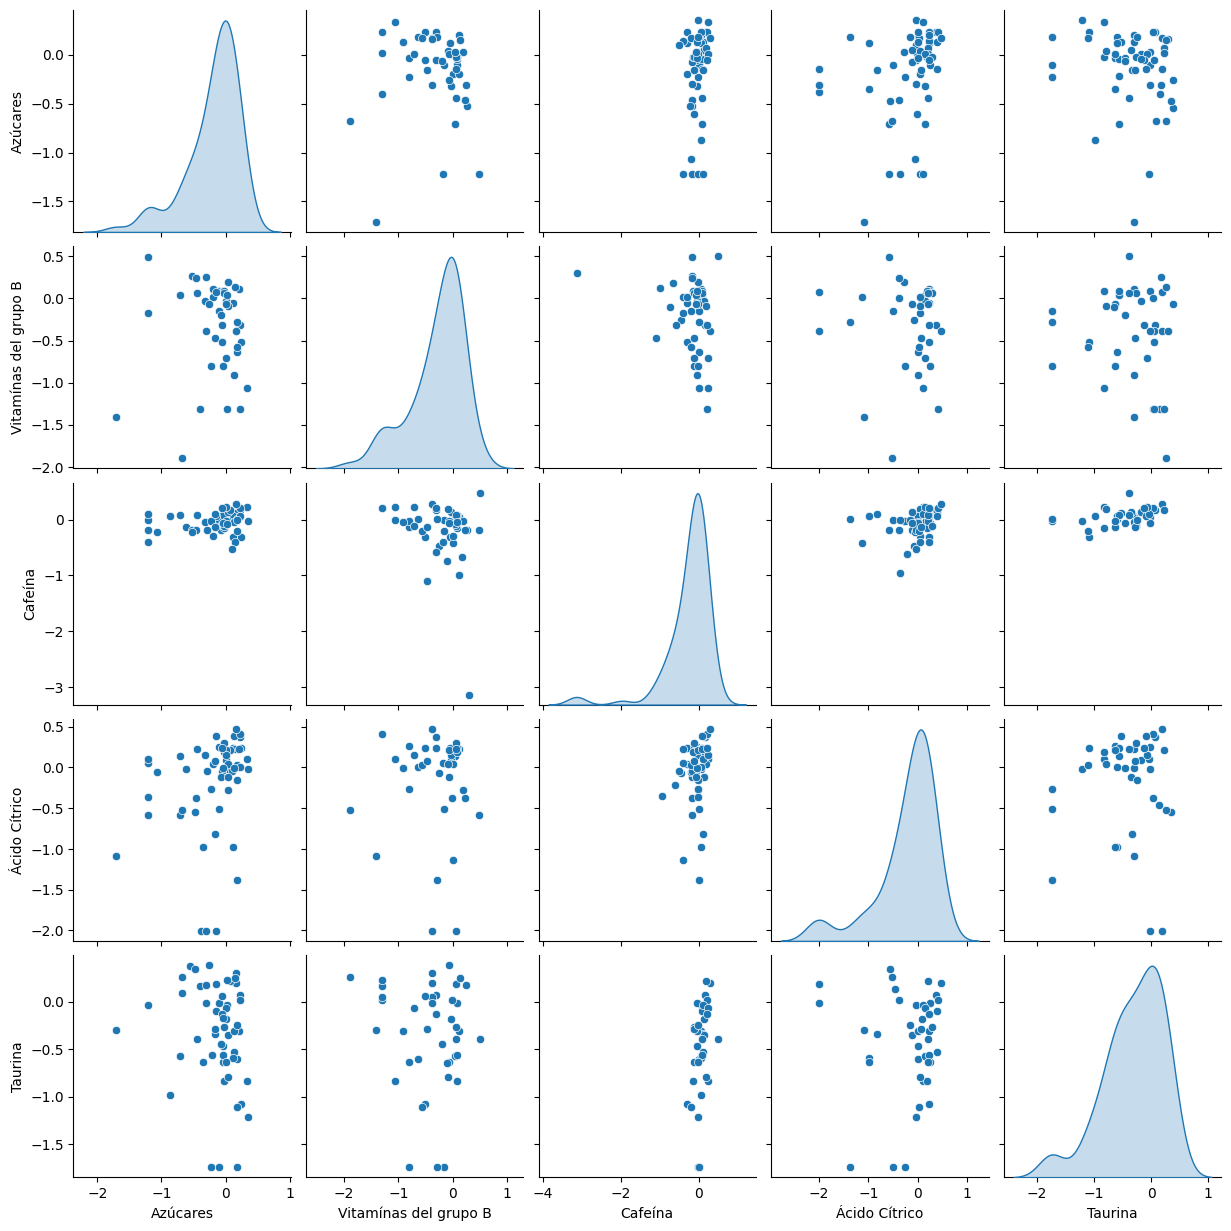

In [152]:
sns.pairplot(data=data_transformed, kind='scatter', diag_kind='kde', height=2.5)
plt.show()

In [153]:
from sklearn.cluster import DBSCAN

# Seleccionar las columnas numéricas
X = data[['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina']]

In [154]:
# Modificar la función para aceptar un rango de valores para min_samples
def DBSCAN_hyperparametros(X, epsilon_range, min_samples_range, anomalies_threshold=0.1):
    """
    Función que busca los mejores parámetros eps y min_samples para DBSCAN 
    donde el porcentaje de anomalías es inferior al umbral.
    
    Parámetros:
    - X: Datos a ser agrupados (DataFrame o array).
    - epsilon_range: Rango de valores de eps para explorar.
    - min_samples_range: Rango de valores de min_samples para explorar.
    - anomalies_threshold: Umbral de anomalías (porcentaje) para seleccionar el mejor modelo.
    
    Retorna:
    - best_eps: Mejor valor de eps.
    - best_min_samples: Mejor valor de min_samples.
    - best_anomalies: Porcentaje de anomalías para los mejores parámetros.
    """
    best_eps = None
    best_min_samples = None
    best_anomalies = float('inf')

    # Bucle para iterar sobre diferentes valores de eps y min_samples
    for eps in epsilon_range:
        for min_samples in min_samples_range:
            # Crear y entrenar el modelo DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(X)

            # Identificar los puntos de anomalía (etiquetas -1 indican anomalías)
            anomalies = np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

            # Si el porcentaje de anomalías es menor que el umbral, guardamos este modelo
            if anomalies < anomalies_threshold:
                best_eps = eps
                best_min_samples = min_samples
                best_anomalies = anomalies
                break
        if best_eps is not None:  # Si se ha encontrado un buen modelo, salimos del bucle
            break
    
    return best_eps, best_min_samples, best_anomalies


In [155]:
# Aplicar la función
# Rangos de eps y min_samples para probar
epsilon_range = np.arange(0.1, 2.0, 0.1)
min_samples_range = range(2, 20)

# Buscar los mejores hiperparámetros
best_eps, best_min_samples, best_anomalies = DBSCAN_hyperparametros(X, epsilon_range, min_samples_range)

# Mostrar los resultados
best_eps, best_min_samples, best_anomalies


(1.0, 2, 0.0915032679738562)

In [156]:
# Entrenar el modelo DBSCAN con los mejores hiperparámetros
best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_model.fit(X)

# Añadir las etiquetas de los clusters al dataframe
X['Cluster_DBSCAN'] = best_model.labels_

In [157]:
X.Cluster_DBSCAN.value_counts()

Cluster_DBSCAN
 0    54
 2    46
 3    35
-1    14
 1     4
Name: count, dtype: int64

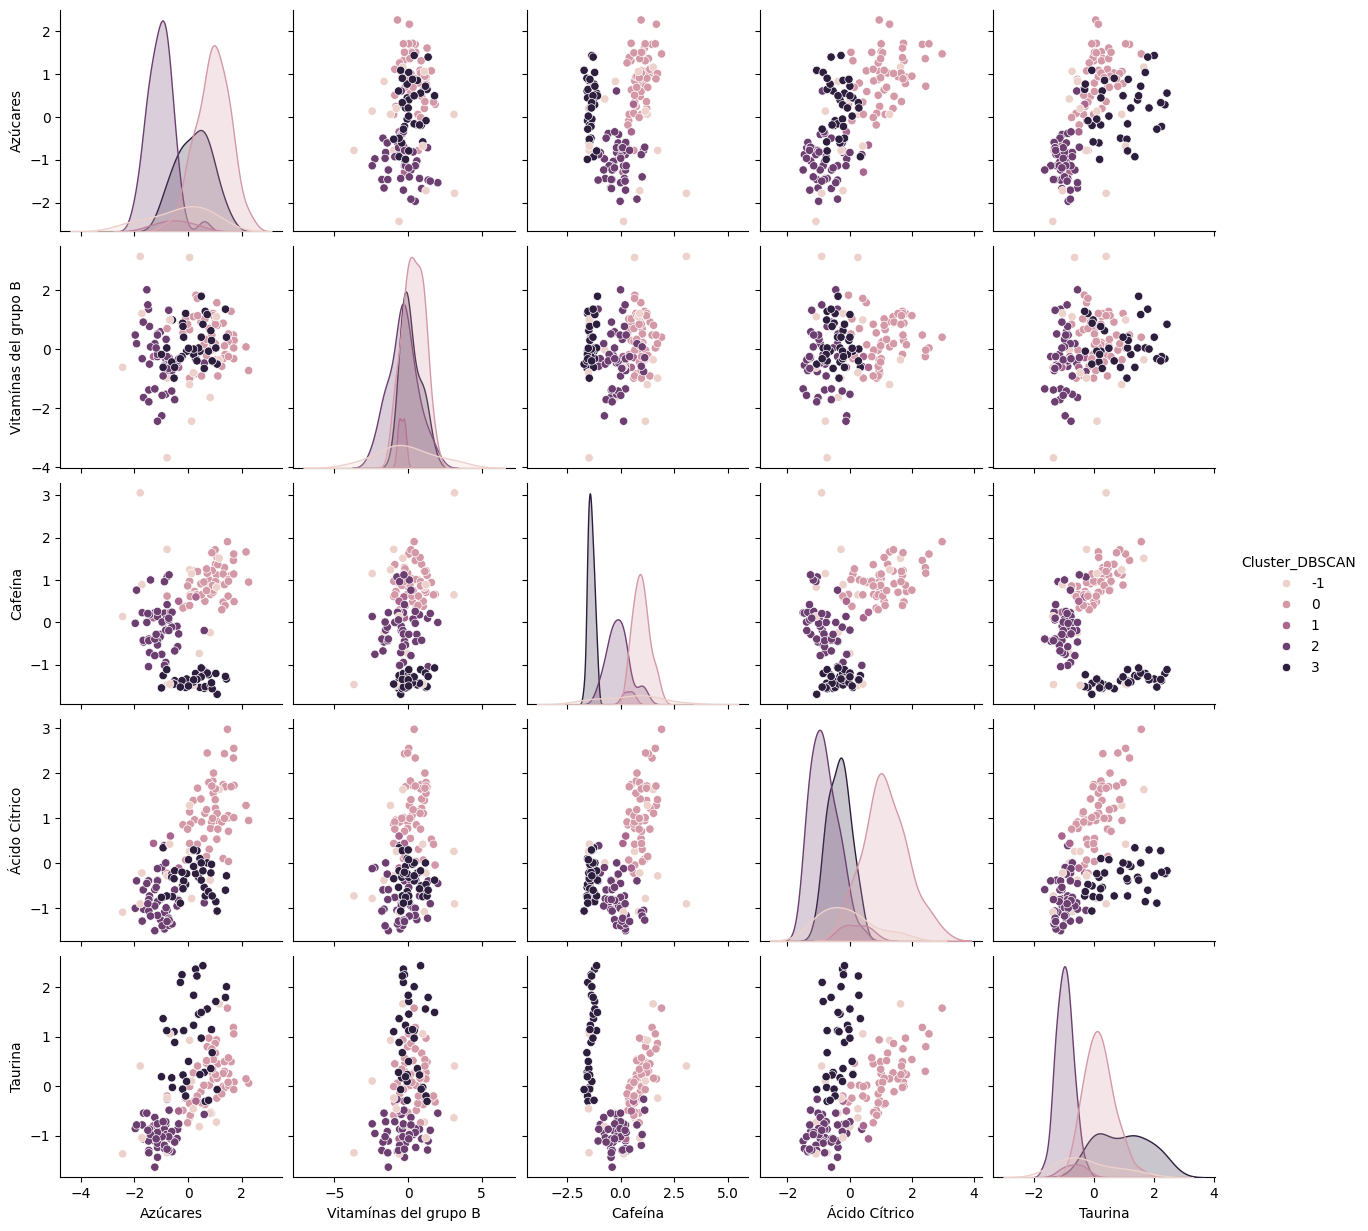

In [158]:
# Visualizar los resultados gráficamente
sns.pairplot(data=X, hue='Cluster_DBSCAN', kind='scatter', diag_kind='kde', height=2.5)
plt.show()

In [159]:
# Seleccionar las columnas numéricas
# X = data[['Cafeína', 'Ácido Cítrico', 'Taurina']]

In [160]:
# # Aplicar la función
# # Rangos de eps y min_samples para probar
# epsilon_range = np.arange(0.1, 2.0, 0.1)
# min_samples_range = range(2, 20)

# # Buscar los mejores hiperparámetros
# best_eps, best_min_samples, best_anomalies = DBSCAN_hyperparametros(X, epsilon_range, min_samples_range)

# # Mostrar los resultados
# best_eps, best_min_samples, best_anomalies

In [161]:
# # Entrenar el modelo DBSCAN con los mejores hiperparámetros
# best_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
# best_model.fit(X)

# # Añadir las etiquetas de los clusters al dataframe
# X['Cluster_DBSCAN2'] = best_model.labels_

In [162]:
# X.Cluster_DBSCAN2.value_counts()

In [163]:
# # Visualizar los resultados gráficamente
# sns.pairplot(data=X, hue='Cluster_DBSCAN2', kind='scatter', diag_kind='kde', height=2.5)
# plt.show()

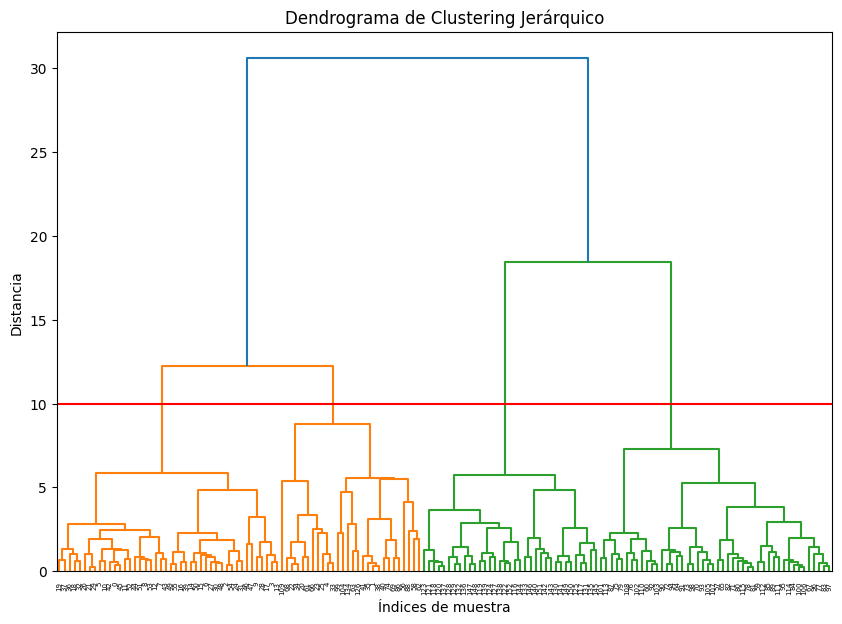

In [164]:
# AGRUPACIÓN JERÁRQUICA
import scipy.cluster.hierarchy as shc

# Seleccionar las columnas numéricas
# X = data[['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina']]

# Generamos el linkage matrix a partir de los datos seleccionados
linked = shc.linkage(X, method='ward', metric='euclidean')

# Dibujamos el dendrograma
plt.figure(figsize=(10, 7))
shc.dendrogram(linked)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índices de muestra")
plt.ylabel("Distancia")
plt.axhline(y = 10, color = 'r', linestyle = '-')
plt.show()

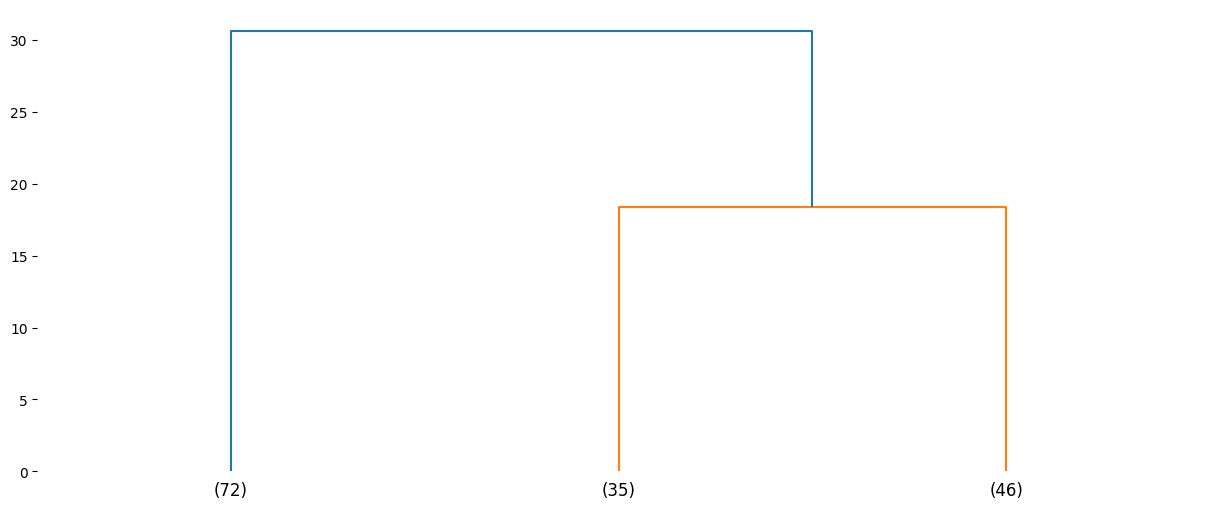

In [165]:
plt.figure(figsize =(15,6))
dend = shc.dendrogram(linked,
                 truncate_mode='lastp',
                 p = 3, # nº clústers
                 )
sns.despine(left=True, bottom=True)

In [166]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# Entrenamos el modelo y asignamos las etiquetas de clústeres a las observaciones
labels = clustering_model.fit_predict(X)

# Asignamos las etiquetas de clúster a cada instancia en el DataFrame original
X['Cluster_Dendro'] = labels

X.Cluster_Dendro.value_counts()


Cluster_Dendro
0    72
1    46
2    35
Name: count, dtype: int64

In [167]:
X.columns

Index(['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico',
       'Taurina', 'Cluster_DBSCAN', 'Cluster_Dendro'],
      dtype='object')

In [168]:
# Calcular los valores medios de las características para cada clúster
cluster_means = X.groupby('Cluster_Dendro')[['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina','Cluster_Dendro']].mean()

# Mostrar los valores medios
cluster_means

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,Cluster_Dendro
Cluster_Dendro,,,,,,
0,0.599370,0.212253,0.821197,0.858251,0.057541,0.0
1,-1.040266,-0.356775,-0.100536,-0.818698,-0.974149,1.0
2,0.218283,0.195208,-1.377707,-0.339733,0.969214,2.0


In [169]:
# Calcular los valores medios de las características para cada clúster
cluster_means = X.groupby('Cluster_DBSCAN')[['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina','Cluster_Dendro']].mean()

# Mostrar los valores medios
cluster_means

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,Cluster_Dendro
Cluster_DBSCAN,,,,,,
-1,-0.303403,-0.149147,0.418097,-0.109753,-0.215768,0.0
0,0.914705,0.353897,0.959521,1.159260,0.182025,0.0
1,-0.497958,-0.435047,0.364671,0.182652,-0.666413,0.0
2,-1.040266,-0.356775,-0.100536,-0.818698,-0.974149,1.0
3,0.218283,0.195208,-1.377707,-0.339733,0.969214,2.0


### Parte II. Nuevos experimentos

Los químicos están muy esperanzados con los modelos que les habéis mostrado y os pasan una lista de nuevos experimentos para que los clasifiquéis. Emplea uno de los modelos construidos, el que te resulte más sencillo, para segmentar los nuevos experimentos que puedes encontrar en "./data/new_experiments.csv"

In [170]:
data = pd.read_csv("./data/new_experiments.csv",sep='|')
data

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina
0,1.481555,0.305159,1.366128,2.239039,0.731870
1,0.616869,0.890014,0.583034,0.312420,-0.665332
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583
5,0.962743,-0.243142,-1.354622,-0.420013,1.956043


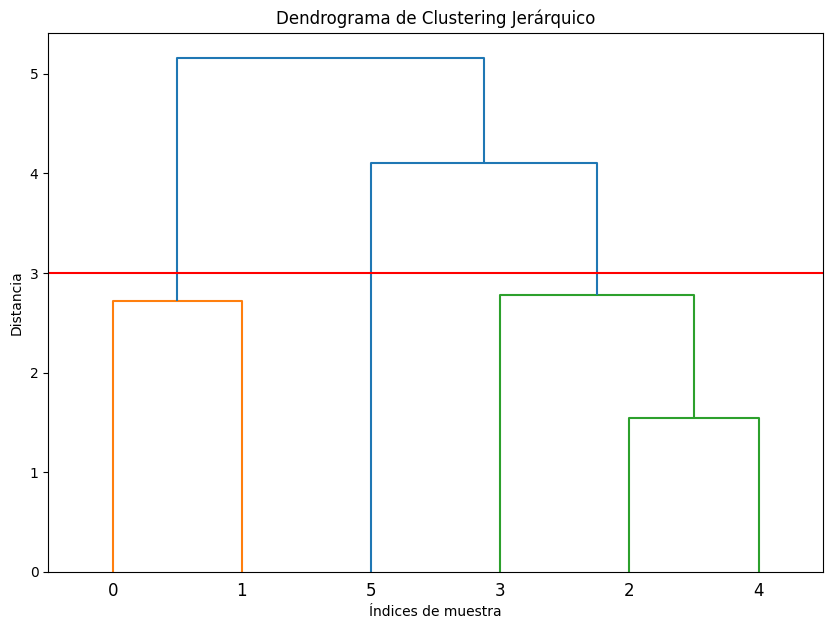

In [171]:
# AGRUPACIÓN JERÁRQUICA
import scipy.cluster.hierarchy as shc

# Seleccionar las columnas numéricas
X_new = data[['Azúcares', 'Vitamínas del grupo B', 'Cafeína', 'Ácido Cítrico', 'Taurina']]

# Generamos el linkage matrix a partir de los datos seleccionados
linked = shc.linkage(X_new, method='ward', metric='euclidean')

# Dibujamos el dendrograma
plt.figure(figsize=(10, 7))
shc.dendrogram(linked)
plt.title("Dendrograma de Clustering Jerárquico")
plt.xlabel("Índices de muestra")
plt.ylabel("Distancia")
plt.axhline(y = 3, color = 'r', linestyle = '-')
plt.show()

In [172]:
clustering_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

# Entrenamos el modelo y asignamos las etiquetas de clústeres a las observaciones
labels = clustering_model.fit_predict(X_new)

# Asignamos las etiquetas de clúster a cada instancia en el DataFrame original
X_new['Cluster_Dendro'] = labels

X_new

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,Cluster_Dendro
0,1.481555,0.305159,1.366128,2.239039,0.731870,1
1,0.616869,0.890014,0.583034,0.312420,-0.665332,1
2,-1.680724,0.341713,-0.340615,-0.213021,-0.976782,0
3,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240,0
4,-0.927212,0.634140,-1.565455,-0.085641,-0.522583,0
5,0.962743,-0.243142,-1.354622,-0.420013,1.956043,2


### Parte III. EXTRA (Voluntario): 6 meses después...

La unidad de experimentación recibió un presupuesto adicional gracias a los modelos que les proporcionastes e hizo pruebas con cliente y obtuvo resultados como para clasificar cada bebida en terminos de "energización" en tres niveles (1, media; 2, media-alta, 3, alta). El resultado de los mismos está en el fichero adecuado en el directorio data y alineado con los experimentos iniciales y al final con los nuevos experimentos de la parte anterior.

Evalua la segmentación de los modelos creados en la primera parte.

In [173]:
data = pd.read_csv("./data/power_results.csv",sep='|')

y = data.copy()

y.value_counts()

class
2        62
1        58
3        39
Name: count, dtype: int64

In [175]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
154,1
155,2
156,2
157,3


In [174]:
X

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,Cluster_DBSCAN,Cluster_Dendro
0,1.518613,0.232053,1.034819,1.013009,0.251717,0,0
1,0.246290,-0.827996,0.733629,0.965242,-0.293321,0,0
2,0.196879,1.109334,1.215533,1.395148,0.269020,0,0
3,1.691550,0.487926,1.466525,2.334574,1.186068,0,0
4,0.295700,1.840403,0.663351,-0.037874,-0.319276,0,0
...,...,...,...,...,...,...,...
148,0.493343,0.414820,-1.284344,0.009893,0.969783,3,2
149,0.332758,-0.389355,-1.344582,0.280575,2.224236,3,2
150,0.209232,0.012732,-1.354622,0.296498,1.834923,3,2
151,1.395086,1.365208,-1.274305,-0.595160,1.791666,3,2


In [178]:
X_exp = pd.concat([X, X_new], axis=0).reset_index(drop=True)

X_exp

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,Cluster_DBSCAN,Cluster_Dendro
0,1.518613,0.232053,1.034819,1.013009,0.251717,0.0,0
1,0.246290,-0.827996,0.733629,0.965242,-0.293321,0.0,0
2,0.196879,1.109334,1.215533,1.395148,0.269020,0.0,0
3,1.691550,0.487926,1.466525,2.334574,1.186068,0.0,0
4,0.295700,1.840403,0.663351,-0.037874,-0.319276,0.0,0
...,...,...,...,...,...,...,...
154,0.616869,0.890014,0.583034,0.312420,-0.665332,NaN,1
155,-1.680724,0.341713,-0.340615,-0.213021,-0.976782,NaN,0
156,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240,NaN,0
157,-0.927212,0.634140,-1.565455,-0.085641,-0.522583,NaN,0


In [179]:
data_exp_results = pd.concat([X_exp,y],axis=1)

data_exp_results

,Azúcares,Vitamínas del grupo B,Cafeína,Ácido Cítrico,Taurina,Cluster_DBSCAN,Cluster_Dendro,class
0,1.518613,0.232053,1.034819,1.013009,0.251717,0.0,0,1
1,0.246290,-0.827996,0.733629,0.965242,-0.293321,0.0,0,1
2,0.196879,1.109334,1.215533,1.395148,0.269020,0.0,0,1
3,1.691550,0.487926,1.466525,2.334574,1.186068,0.0,0,1
4,0.295700,1.840403,0.663351,-0.037874,-0.319276,0.0,0,1
...,...,...,...,...,...,...,...,...
154,0.616869,0.890014,0.583034,0.312420,-0.665332,NaN,1,1
155,-1.680724,0.341713,-0.340615,-0.213021,-0.976782,NaN,0,2
156,-0.284874,-1.412851,-0.782361,-1.193845,-0.717240,NaN,0,2
157,-0.927212,0.634140,-1.565455,-0.085641,-0.522583,NaN,0,3


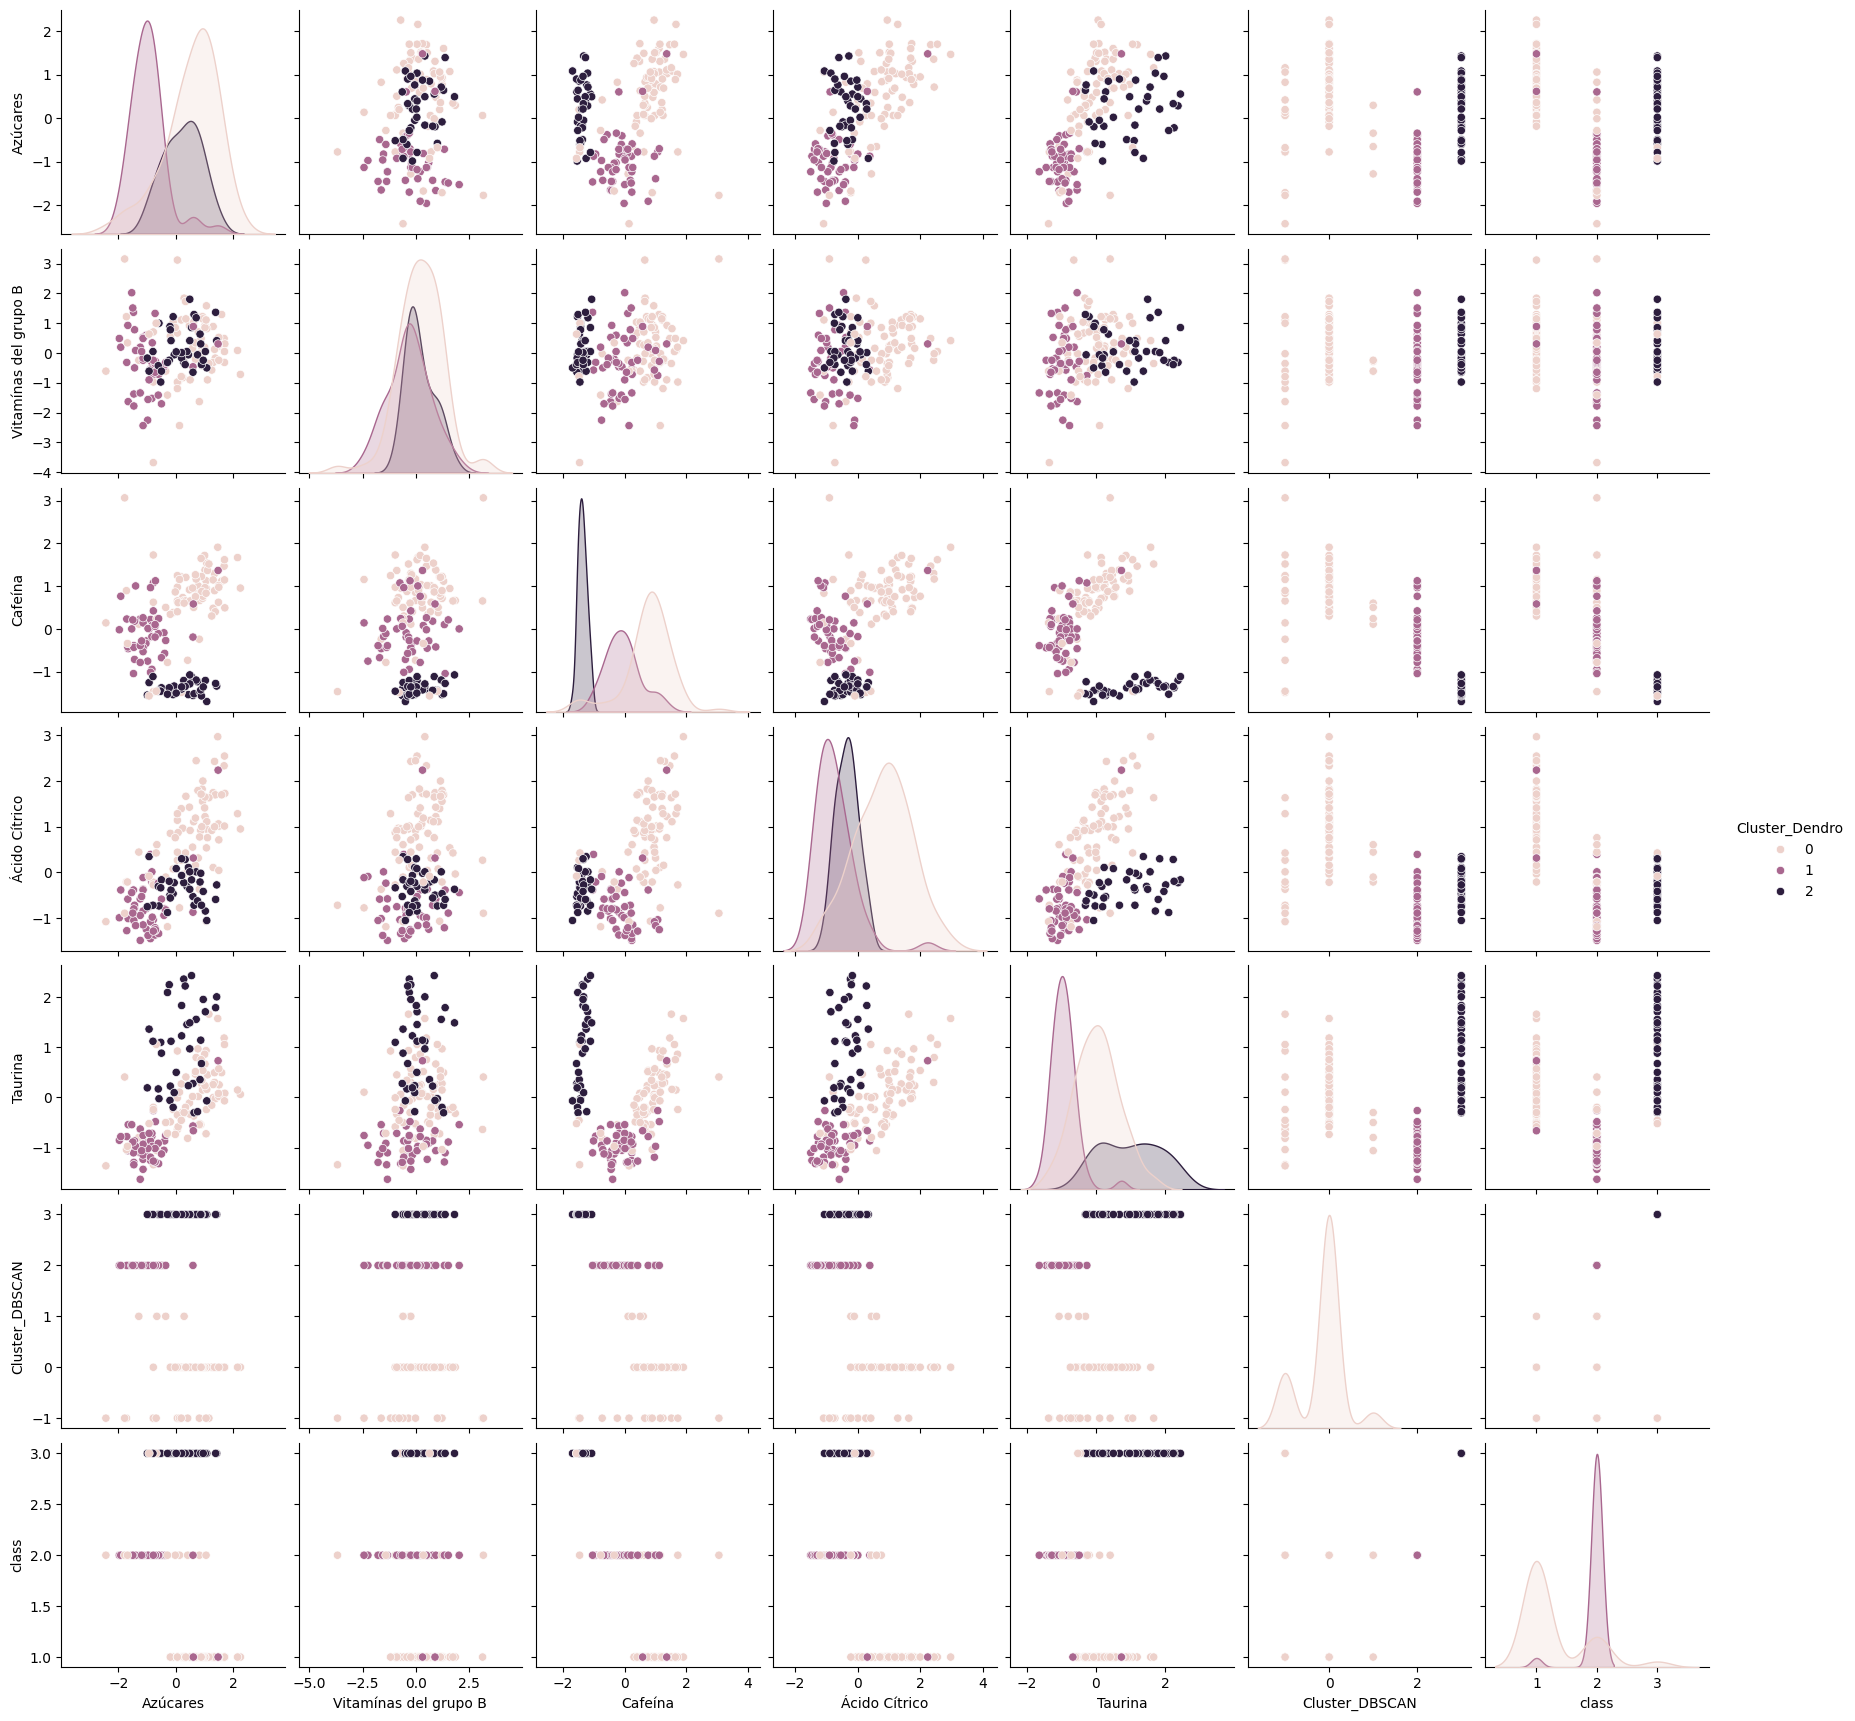

In [180]:
# Visualizar los resultados gráficamente
sns.pairplot(data=data_exp_results, hue='Cluster_Dendro', kind='scatter', diag_kind='kde', height=2.5)
plt.show()

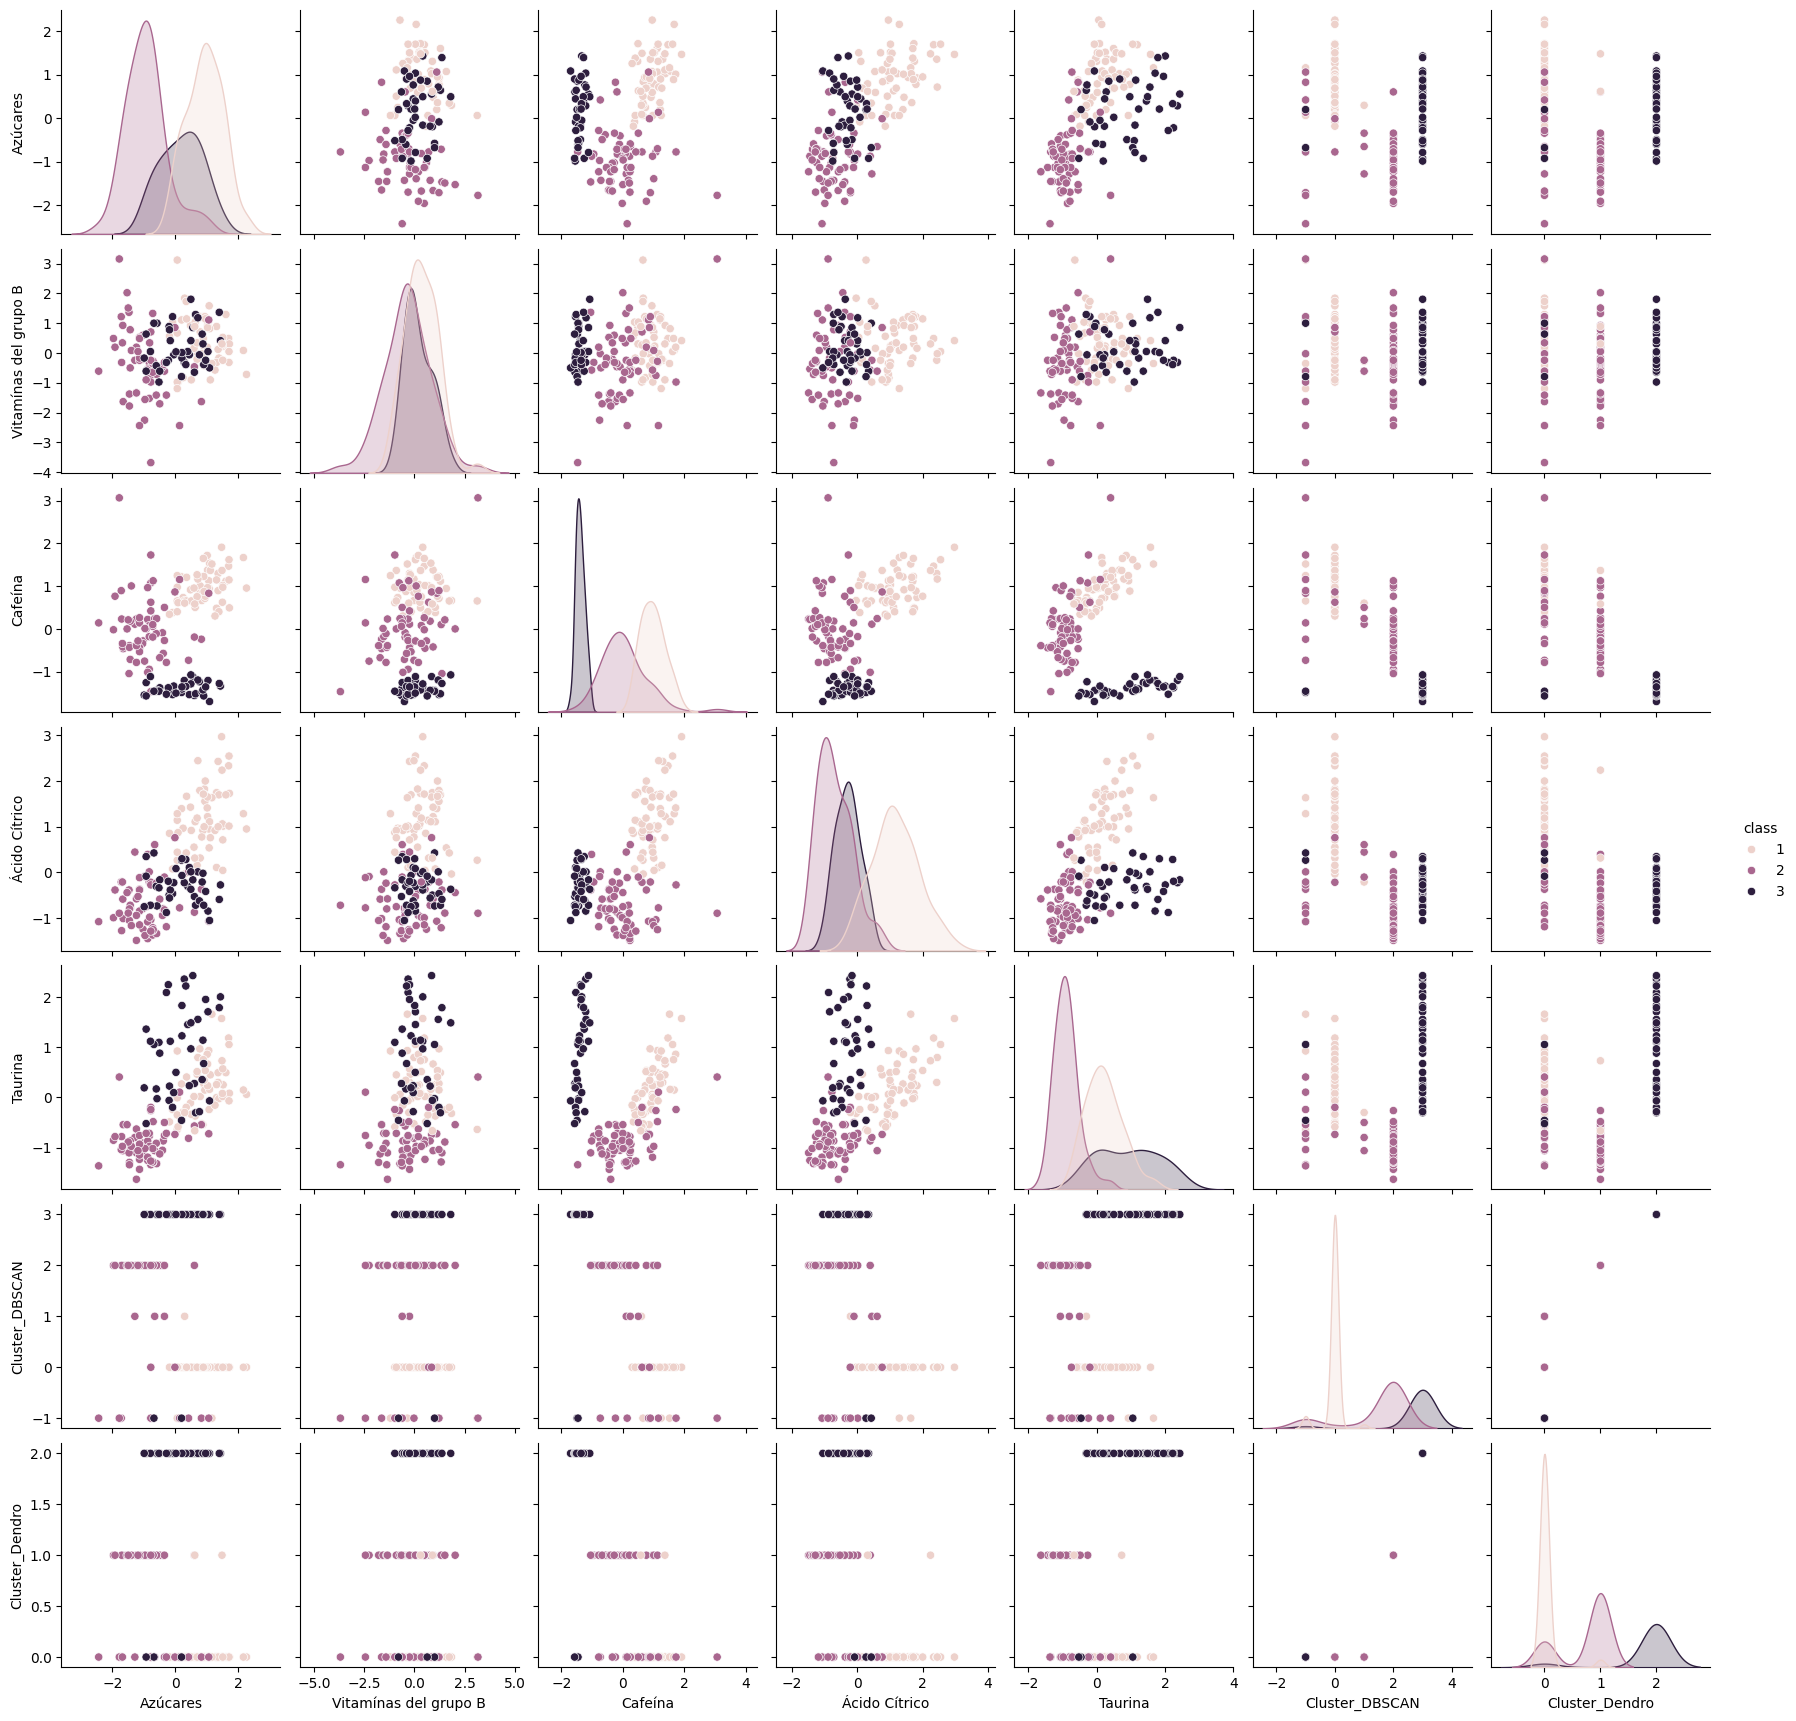

In [181]:
# Visualizar los resultados gráficamente
sns.pairplot(data=data_exp_results, hue='class', kind='scatter', diag_kind='kde', height=2.5)
plt.show()

In [182]:
from sklearn.metrics import adjusted_rand_score, accuracy_score

# Calcular el Índice de Rand Ajustado (ARI)
ari_score = adjusted_rand_score(data_exp_results['Cluster_Dendro'], data_exp_results['class'])
print(f"Índice de Rand Ajustado (ARI): {ari_score}")

# Calcular la exactitud (proporción de coincidencias exactas)
accuracy = accuracy_score(data_exp_results['Cluster_Dendro'], data_exp_results['class'])
print(f"Exactitud: {accuracy}")

Índice de Rand Ajustado (ARI): 0.622725067095795
Exactitud: 0.012578616352201259


In [183]:
data_exp_results.Cluster_Dendro.value_counts()

Cluster_Dendro
0    75
1    48
2    36
Name: count, dtype: int64

In [184]:
data_exp_results['class'].value_counts()

class
2    62
1    58
3    39
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

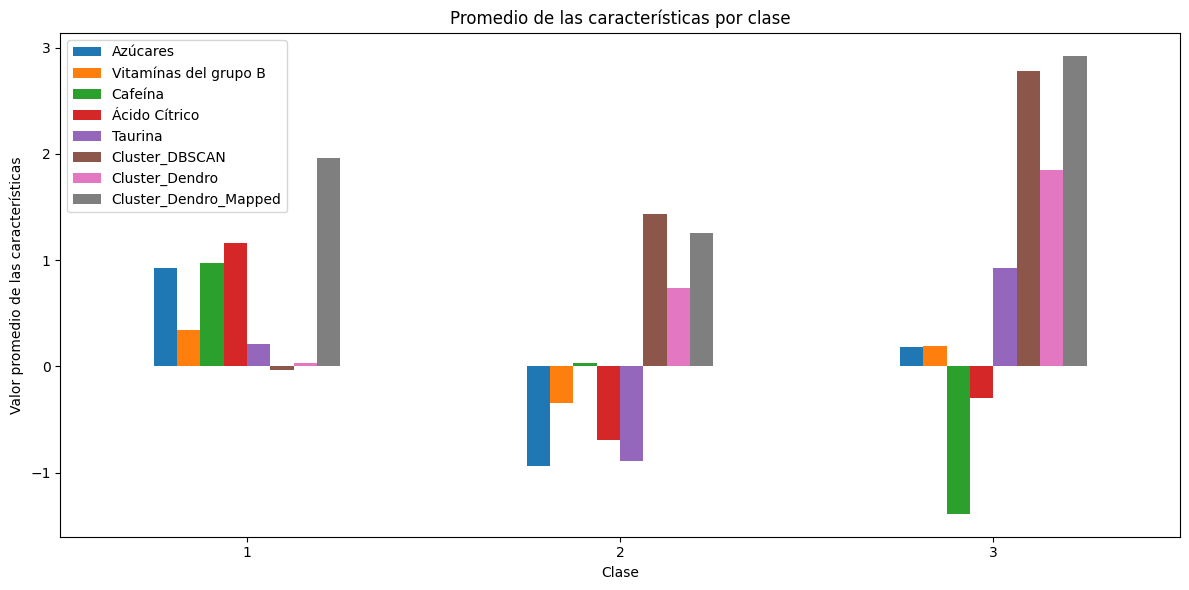

In [188]:
# Agrupar los datos por la columna 'class' y calcular el promedio de las características
class_means = data_exp_results.groupby('class').mean()

# Crear un diagrama de barras para las características de cada clase
plt.figure(figsize=(10, 6))
class_means.plot(kind='bar', figsize=(12, 6))

# Ajustar los detalles del gráfico
plt.title('Promedio de las características por clase')
plt.xlabel('Clase')
plt.ylabel('Valor promedio de las características')
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<Figure size 1000x600 with 0 Axes>

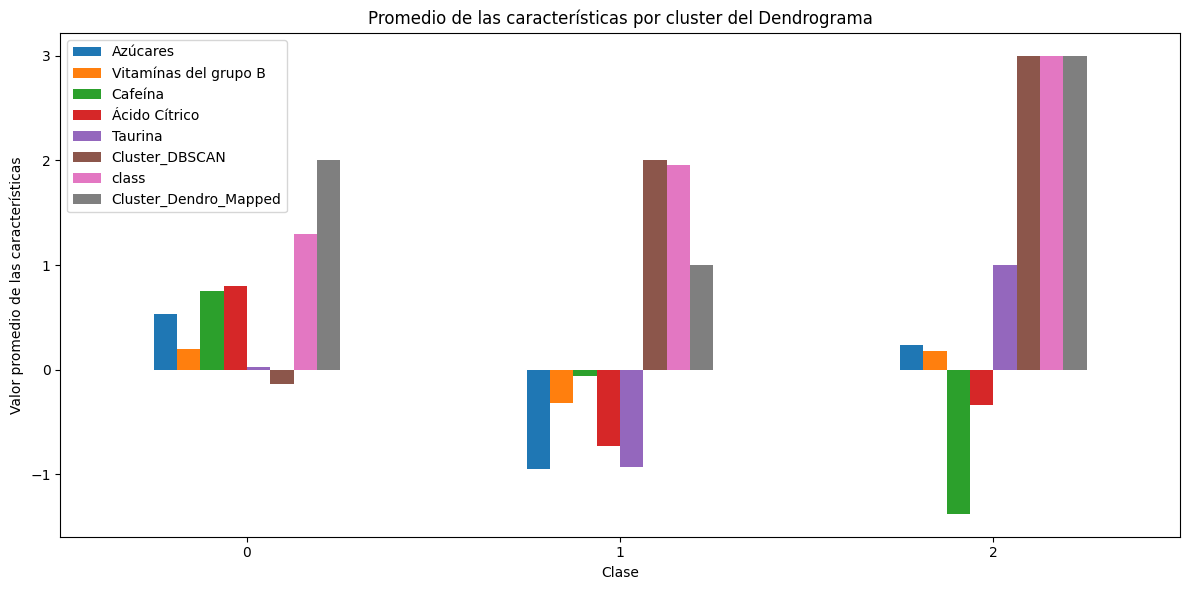

In [191]:
# Agrupar los datos por la columna 'class' y calcular el promedio de las características
dendro_means = data_exp_results.groupby('Cluster_Dendro').mean()

# Crear un diagrama de barras para las características de cada clase
plt.figure(figsize=(10, 6))
dendro_means.plot(kind='bar', figsize=(12, 6))

# Ajustar los detalles del gráfico
plt.title('Promedio de las características por cluster del Dendrograma')
plt.xlabel('Clase')
plt.ylabel('Valor promedio de las características')
plt.xticks(rotation=0)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [192]:
class_mapping = {0: 1, 1: 2, 2: 3}

# Aplicar el mapeo a la columna 'Cluster_Dendro'
data_exp_results['Cluster_Dendro_Mapped'] = data_exp_results['Cluster_Dendro'].map(class_mapping)

In [193]:
# Calcular el Índice de Rand Ajustado (ARI)
ari_score = adjusted_rand_score(data_exp_results['Cluster_Dendro_Mapped'], data_exp_results['class'])
print(f"Índice de Rand Ajustado (ARI): {ari_score}")

# Calcular la exactitud (proporción de coincidencias exactas)
accuracy = accuracy_score(data_exp_results['Cluster_Dendro_Mapped'], data_exp_results['class'])
print(f"Exactitud: {accuracy}")

Índice de Rand Ajustado (ARI): 0.622725067095795
Exactitud: 0.8679245283018868
